In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import random
import string
import time
import warnings
import pickle
from functools import wraps
import time
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', 400)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [2]:
BASE_DIR = os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, '../data/')

In [3]:
os.listdir(DATA_DIR)

['Data_2_TimeDeposit_10K.csv',
 'Data_3_Banking_Prediction_Sample_10K.csv',
 'data_pre.csv',
 'interim.csv',
 'interim_2.csv']

use Data_3

In [4]:
# df_data_2 = pd.read_csv(os.path.join(DATA_DIR, 'Data_2_TimeDeposit_10K.csv'), sep=';')
df_data_3 = pd.read_csv(os.path.join(DATA_DIR, 'Data_3_Banking_Prediction_Sample_10K.csv'), sep=';')

# Exploratory analysis & Preprocessing

In [5]:
df_data_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer_ID            10000 non-null  int64  
 1   Gender                 10000 non-null  object 
 2   Age                    10000 non-null  int64  
 3   Tenure                 10000 non-null  int64  
 4   Saving_Amount          10000 non-null  float64
 5   Current_Amount         10000 non-null  float64
 6   Time_Deposits_Amount   10000 non-null  float64
 7   Funds_Amount           10000 non-null  float64
 8   Stocks_Amount          10000 non-null  float64
 9   Bank_Assurance_Amount  10000 non-null  float64
 10  Life_Assurance_Amount  10000 non-null  float64
 11  Business_Loan_Amount   10000 non-null  float64
 12  Home_Loan_Amount       10000 non-null  float64
 13  Consumer_Loan_Amount   10000 non-null  float64
 14  Branch_Transactions    10000 non-null  int64  
 15  ATM

Data is, to a large degree, pretty clean

In [6]:
df_data_3[df_data_3.isna().any(axis=1)]

,Customer_ID,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag


In [7]:
df_data_3.Gender.unique()

array(['M', 'F'], dtype=object)

Create copy of the dataset for further use

In [8]:
df = df_data_3.copy()

Drop customer_id

In [9]:
df = df.drop("Customer_ID", axis=1)
# df.to_csv(os.path.join(DATA_DIR, 'data_pre.csv')) # export df

Convert gender to binary (F = 0; M = 1)

In [10]:
df['Gender'].replace(['F','M'], [0,1], inplace=True)
df.Gender.unique()

array([1, 0], dtype=int64)

In [11]:
df.describe()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,0.63770,49.98710,91.60140,2094.19843,508.44775,2033.54343,2070.36767,1438.51247,16.54391,3.58117,574.42015,1890.83444,675.94123,3.19350,2.98130,0.04840,0.04660,0.25840,0.08730
std,0.48069,13.40956,23.19901,8114.08376,4144.21387,20281.25820,14113.91714,39719.75305,95.66872,44.34891,7311.64001,13083.22498,1913.45464,8.47589,7.40793,0.64117,0.47334,1.47195,0.28229
min,0.00000,18.00000,49.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,39.00000,79.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,49.00000,86.00000,24.29714,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000
75%,1.00000,59.00000,106.00000,731.46429,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.69750,4.00000,1.00000,0.00000,0.00000,0.00000,0.00000
max,1.00000,89.00000,194.00000,233325.96714,162375.11000,1138800.66000,471145.82143,3826403.85286,1912.96571,1670.48000,434857.33714,499842.06143,28064.52000,221.00000,94.00000,19.00000,15.00000,34.00000,1.00000


Data is imbalanced

In [12]:
df.New_Credit_Card_Flag.value_counts()

0    9127
1     873
Name: New_Credit_Card_Flag, dtype: int64

Collinearity is relatively low

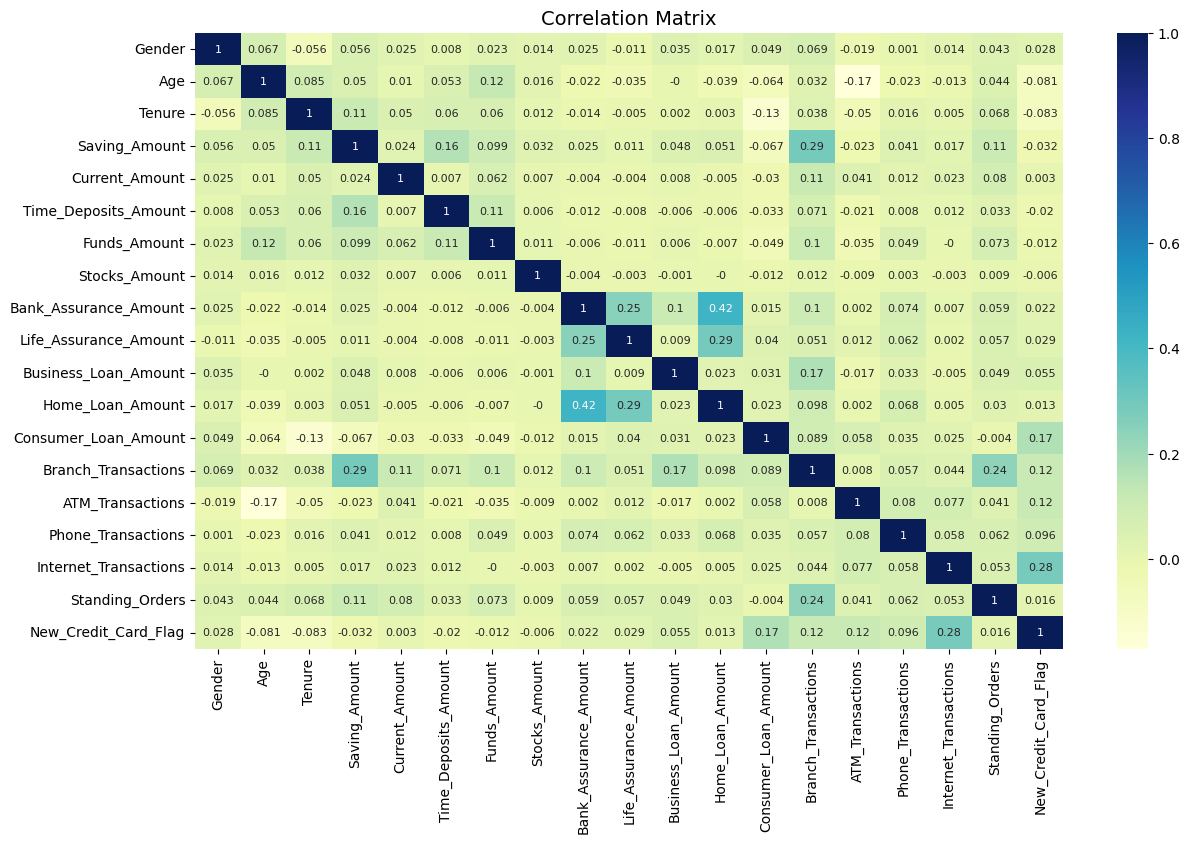

In [13]:
fig, ax = plt.subplots(figsize=(14,8)) # Sample figsize in inches
corr = df.corr() # Imbalanced DataFrame Correlation
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':8}, ax=ax, annot=corr.round(3))
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

# Modeling

Import libraries

In [14]:
from optbinning import BinningProcess

from sklearn.model_selection import train_test_split, StratifiedKFold, learning_curve
from sklearn.feature_selection import RFECV
from itertools import compress
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
# import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.metrics import roc_auc_score, precision_score, f1_score, recall_score, brier_score_loss, confusion_matrix, roc_curve, accuracy_score

from scipy.stats import chi2_contingency, ks_2samp
import shap

Set seed (and model directory)

In [15]:
SEED = 39028578
MODEL_DIR = os.path.join(BASE_DIR, '../models/')

Split data into train, validation and test sets

In [16]:
explained_var = 'New_Credit_Card_Flag'

Y = df[explained_var]
X = df.drop(explained_var, axis=1)

# (70%/15%/15%) Split
X_temp, X_test, y_temp, y_test = train_test_split(X, Y, stratify = Y, test_size = 0.15, random_state = SEED)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, stratify = y_temp, test_size = 0.1275, random_state = SEED)

In [17]:
# used later for fitting of selected (final) model
X_train_valid = pd.concat([X_train, X_valid])
y_train_valid = pd.concat([y_train, y_valid])

## Modelling logic
2 different approaches regarding the data used:
- Default case - No further data transformations
- Binning case - Binning + WoE transformation applied

### Approach
- Both cases share the same base models
- Bayesian Optimization with Stratified CV are then used to tune the models' hyperparameters on the training data
- *class_weight* parameter is an attempt to deal with class imbalance, Recursive Feature Elimination is used for feature selection
- Models are evaluated on the validation data using several different metrics (defined below)
- The "best-performing" model is then selected and its performance evaluated on the testing data (evaluation methods again below)

### Models
Further steps define different models to be used for classification<br>
Base class **Classifier** defines the relevant methods, metrics etc. used for modelling purposes<br>
Models used then represent **sub-classes** of the base class, each defining mainly the *search space* Bayesian Optimization will use to tune given model

In [18]:
# debug decorator
def timeit(method):

    @wraps(method)
    def _impl(self, *method_args, **method_kwargs):

        ts = time.time()
        method_output = method(self, *method_args, **method_kwargs)
        te = time.time()

        info = f'{self.__class__.__name__} | {method.__name__} | time: {round((te -ts),2)}s'
        if self._time:
            print(info)

        return method_output

    return _impl

In [56]:
class Classifier:

    def __init__(self) -> None:
        self.model = None
        self.search_space = None
        self.cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
        self.bayescv = None
        self.rfecv = None
        self.metrics = {}
        self._time = False

    @timeit
    def optimize(self, X, y, scoring_metric='f1_weighted'):
        self.bayescv = BayesSearchCV(estimator=self.model,
                                     search_spaces=self.search_space,
                                     scoring=scoring_metric,
                                     cv=self.cv,
                                     n_jobs=-1,
                                     n_iter=50,
                                     verbose=0,
                                     refit=True,
                                     random_state=SEED)
        self.bayescv.fit(X, y)
        return self.bayescv.best_estimator_

    @timeit
    def select_features(self, X, y, scoring_metric='f1_weighted'):
        if self.bayescv is None:
            raise Exception(
                'select_features() expects optimize() to run beforehand')

        tuned_params = self.bayescv.best_estimator_.get_params()
        n_feats = tuned_params[
            'max_features'] if 'max_features' in tuned_params.keys() else 1

        self.rfecv = RFECV(estimator=self.bayescv.best_estimator_,
                           step=1,
                           min_features_to_select=n_feats,
                           scoring=scoring_metric,
                           cv=self.cv,
                           n_jobs=-1,
                           verbose=0)
        self.rfecv.fit(X, y)
        return self.rfecv.estimator_

    @timeit
    def get_metrics(self, x_val, y_val):
        if self.rfecv is None:
            raise Exception(
                'get_metrics() expects select_features() to run beforehand')

        opt_model = self.rfecv.estimator_
        sel_feats = self.rfecv.support_
        x_val_filtered = x_val[x_val.columns[sel_feats]]
        pred_proba = opt_model.predict_proba(x_val_filtered)
        pred = opt_model.predict(x_val_filtered)

        self.metrics['Accuracy'] = accuracy_score(y_val, pred)
        self.metrics['Precision'] = precision_score(y_val, pred)
        self.metrics['Recall'] = recall_score(y_val, pred)
        self.metrics['F1'] = f1_score(y_val, pred)
        self.metrics['AUC'] = roc_auc_score(y_val, pred_proba[:, 1])
        self.metrics['Brier'] = brier_score_loss(y_val, pred_proba[:, 1])
        self.metrics['Gini'] = 2 * self.metrics['AUC'] - 1
        # self.metrics['KS'] = # TODO ?
        return self.metrics

    def get_model(self):
        if self.rfecv is not None:
            return self.rfecv.estimator_
        if self.bayescv is not None:
            return self.bayescv.best_estimator_
        return self.model

    def save_model(self, model_name = None):
        if not model_name:
            uid = '_uid_' + ''.join(random.choices(string.digits, k=8)) + "_"
            model_name = self.__class__.__name__ + "model" + uid + ".h5"
        fs_model_file = open(os.path.join(MODEL_DIR, model_name), "wb")
        pickle.dump(self.get_model(), fs_model_file)
        fs_model_file.close()

    # extra...
    def _fix_errors(self):
        if isinstance(self.search_space, tuple):
            self.search_space = self.search_space[0]
        if isinstance(self.model, tuple):
            self.model = self.model[0]

    def _time_on(self):
        self._time = True

    def _time_off(self):
        self._time = False


In [20]:
class RFClassifier(Classifier):

    def __init__(self) -> None:
        super().__init__()
        self.model = RandomForestClassifier(random_state=SEED)
        self.search_space = {
            'n_estimators': Integer(1, 1000),
            'criterion': Categorical(['gini', 'entropy']),
            'max_depth': Integer(1, 15),
            'max_features': Integer(3, 15),
            'min_samples_leaf': Integer(5, 500),
            'class_weight': Categorical(['balanced', 'balanced_subsample']),
        }


class GBClassifier(Classifier):

    def __init__(self) -> None:
        super().__init__()
        self.model = GradientBoostingClassifier(random_state=SEED)
        self.search_space = {
            'n_estimators': Integer(1, 1000),
            'max_depth': Integer(1, 15),
            "learning_rate": Real(0.001, 100),
            'min_samples_leaf': Integer(5, 500),
            'max_features': Integer(3, 15),
        }


class LRClassifier(Classifier):

    def __init__(self) -> None:
        super().__init__()
        self.model = LogisticRegression(random_state=SEED)
        self.search_space = {
            'fit_intercept': Categorical([True, False]),
            'C': Real(0.001, 1000),
            'class_weight': Real(0.001, 1000),
        }


class DTClassifier(Classifier):

    def __init__(self) -> None:
        super().__init__()
        self.model = DecisionTreeClassifier(random_state=SEED)
        self.search_space = {
            'criterion': Categorical(['gini', 'entropy']),
            'max_depth': Integer(1, 15),
            'max_features': Integer(3, 15),
            'min_samples_leaf': Integer(5, 500),
            'class_weight': Categorical(['balanced']),
        }


class XGBoostClassifier(Classifier):

    def __init__(self) -> None:
        super().__init__()
        self.model = XGBClassifier(seed=SEED,
                                   silent=1,
                                   n_jobs=-1,
                                   objective='binary:logistic',
                                   eval_metric='auc',
                                   tree_method='approx'),

        self.search_space = {
            'learning_rate': (0.01, 1.0, 'log-uniform'),
            'min_child_weight': (0, 10),
            'max_depth': (0, 50),
            'max_delta_step': (0, 20),
            'subsample': (0.01, 1.0, 'uniform'),
            'colsample_bytree': (0.01, 1.0, 'uniform'),
            'colsample_bylevel': (0.01, 1.0, 'uniform'),
            # 'reg_lambda': (1e-9, 1000, 'log-uniform'), Error
            'reg_lambda': (1, 1000, 'log-uniform'),
            'reg_alpha': (1e-9, 1.0, 'log-uniform'),
            'gamma': (1e-9, 0.5, 'log-uniform'),
            'min_child_weight': (0, 5),
            # 'n_estimators': (50, 100), Error
            'n_estimators': (1, 1000),
            # 'scale_pos_weight': (1e-6, 500, 'log-uniform') Error
            'scale_pos_weight': (1, 500, 'log-uniform')  # == class weight
        },


In [21]:
def conf_matrix_plot(X, y, model):
    X_filtered = X[X.columns[model.rfecv.support_]]
    cm = confusion_matrix(y, model.get_model().predict(X_filtered))
    sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='g')
    plt.show()


def ROC_curve_plot(X, y, model):
    X_filtered = X[X.columns[model.rfecv.support_]]
    best_estimator = model.rfecv.estimator_
    y_test_scores = best_estimator.predict_proba(X_filtered)[:, 1]
    FPR, TPR, _ = roc_curve(y, y_test_scores)
    AUC = round(roc_auc_score(y, y_test_scores), 2)

    fig, ax = plt.subplots()
    plt.title('Receiver Operating Characteristic Curve')

    ax.plot(FPR, TPR, 'b', label=f"AUC = {AUC}")
    ax.plot([0, 1], [0, 1], 'r--')

    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive rate')

    for spine in ['top', 'right', 'left']:
        ax.spines[spine].set_visible(False)

    plt.grid()
    plt.legend()
    plt.show()


def learning_curve_plot(X, y, model):
    X_filtered = X[X.columns[model.rfecv.support_]]
    train_sizes, train_scores, test_scores = learning_curve(
        model.get_model(),
        X_filtered,
        y,
        cv=10,
        scoring='f1_weighted',
        train_sizes=np.linspace(0.01, 1.0, 100),
        n_jobs=-1,
        random_state=SEED)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes,
             train_mean,
             color='blue',
             marker='o',
             markersize=3,
             label='Training F1 score')

    plt.fill_between(train_sizes,
                     train_mean + train_std,
                     train_mean - train_std,
                     alpha=0.2,
                     color='blue')

    plt.plot(train_sizes,
             test_mean,
             color='green',
             marker='o',
             linestyle='--',
             markersize=3,
             label='Test F1 score')

    plt.fill_between(train_sizes,
                     test_mean + test_std,
                     test_mean - test_std,
                     alpha=0.2,
                     color='green')

    plt.title('Learning Curve')
    plt.xlabel('Training set size')
    plt.ylabel('Weighted F1 score')

    plt.grid()
    plt.legend(loc='best')
    plt.show()

In [155]:
RF1 = RFClassifier()
GB1 = GBClassifier()
LR1 = LRClassifier()
DT1 = DTClassifier()
XG1 = XGBoostClassifier()

metrics = {}

for model in [
        RF1,
        GB1,
        LR1,
        DT1,
        XG1,
]:
    model._time_on()
    model._fix_errors()
    model.optimize(X_train, y_train)
    model.select_features(X_train, y_train)
    model_metrics_dict = model.get_metrics(X_valid, y_valid)
    metrics[model.__class__.__name__] = model_metrics_dict
# 35 min + 50 min xgb

In [159]:
pd.DataFrame.from_dict(metrics)

,RFClassifier,GBClassifier,LRClassifier,DTClassifier,XGBoostClassifier
Accuracy,0.90867,0.92897,0.91974,0.84779,0.92712
Precision,0.47674,0.70455,0.90000,0.30114,0.64286
Recall,0.43158,0.32632,0.09474,0.55789,0.37895
F1,0.45304,0.44604,0.17143,0.39114,0.47682
AUC,0.82510,0.76428,0.54685,0.72176,0.78232
Brier,0.07193,0.06784,0.24877,0.12286,0.06337
Gini,0.65019,0.52856,0.09370,0.44351,0.56463


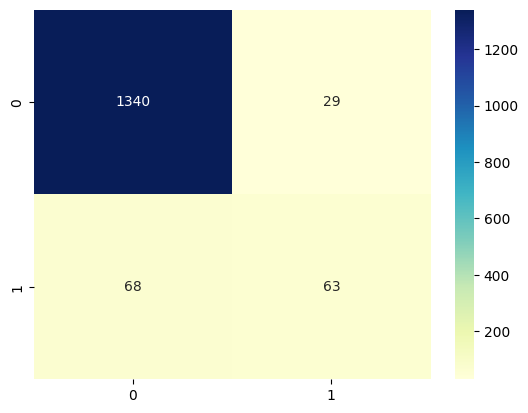

In [161]:
conf_matrix_plot(X_test, y_test, XG1)

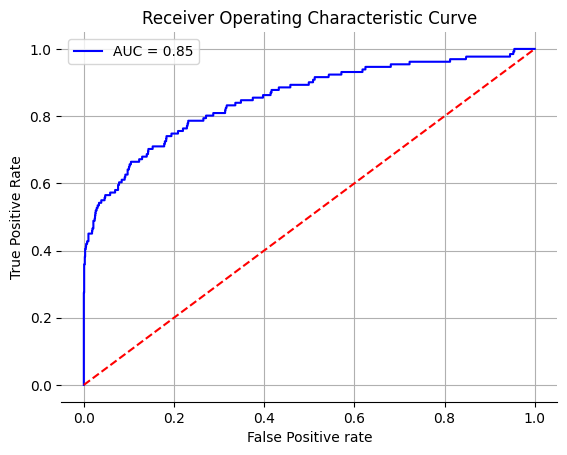

In [185]:
ROC_curve_plot(X_test, y_test, XG1)


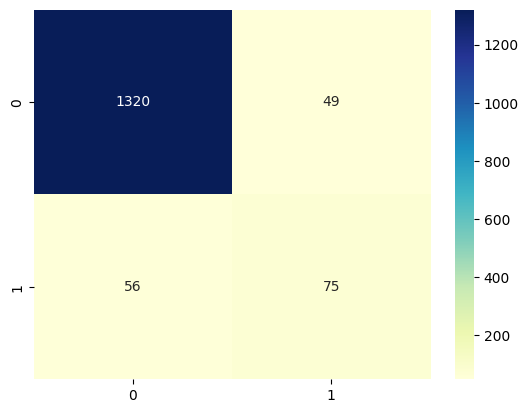

In [165]:
conf_matrix_plot(X_test, y_test, RF1)


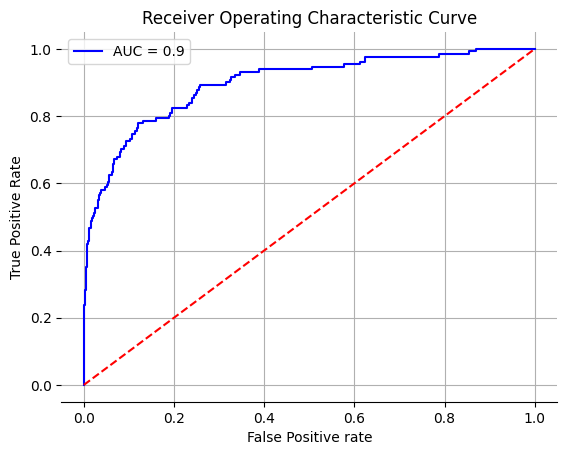

In [176]:

ROC_curve_plot(X_test, y_test, RF1)

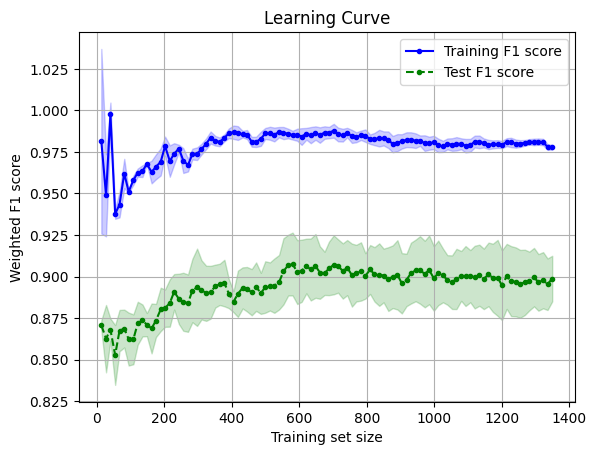

In [191]:
learning_curve_plot(X_train_valid, y_train_valid, RF1) # TODO: x_train + x_val

---

# TODO - Komentar

In [22]:
def get_binned_data(X_train, y_train, X_holdout, cat_vars):
 #Initializing the binning process object.
  bn = BinningProcess(variable_names = list(X_train.columns), categorical_variables = cat_vars)

  #Fitting the binning on training set.
  bn.fit(X_train,y_train)

  #Transforming both training set and test set based on the fitted training binning.
  x_train_binned = bn.transform(X_train, metric='woe')
  x_train_binned.index = X_train.index
  x_holdout_set_binned = bn.transform(X_holdout, metric='woe')
  x_holdout_set_binned.index = X_holdout.index

  bins_woe = pd.DataFrame()
  
  #DataFrame including binned categories' information.
  for i in X_train.columns:
    var = bn.get_binned_variable(i).binning_table.build()
    var = var[(~var['Bin'].isin(['Special', 'Missing'])) & (~var.index.isin(['Totals']))]
    var['Variable'] = i
    bins_woe = pd.concat((bins_woe, var))
  
  return x_train_binned, x_holdout_set_binned, bins_woe.loc[:,~bins_woe.columns.isin(['IV','JS'])], bn


In [23]:
X_test_binned = get_binned_data(X_train, y_train, X_test, [])[1]
X_train_binned, X_valid_binned, woe_bins, bn = get_binned_data(X_train, y_train, X_valid, [])

In [24]:
bn.save(os.path.join(MODEL_DIR, 'binning_woe_model_2.h5'))

In [25]:
X_train_binned.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders
7907,-0.06654,-0.29115,-0.11715,-0.00436,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,-0.37550,-0.14343,-0.96892,0.00000,0.00000,0.01066
575,-0.06654,-0.11018,-0.43570,-0.39424,0.01402,0.00000,-0.04074,-0.09395,-0.24681,0.00000,0.00000,0.01978,0.45970,0.80182,0.51785,0.00000,0.00000,0.01066
5168,-0.06654,0.29479,0.04872,0.62416,0.01402,0.00000,-0.04074,0.51235,0.01660,0.00000,0.00000,0.01978,0.45970,0.40818,0.51785,0.00000,0.00000,0.01066
103,-0.06654,1.31420,-0.43570,0.62416,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,-1.06343,0.51785,0.00000,0.00000,0.01066
7048,-0.06654,0.29479,0.00101,0.03226,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,-0.28672,0.45970,-0.29512,0.51785,0.00000,0.00000,0.01066


In [26]:
X_valid_binned.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders
2285,0.12825,-0.15242,0.66835,-0.39424,-0.31317,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,0.80182,-0.96892,0.00000,0.00000,0.01066
2826,-0.06654,-0.11018,0.30289,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,0.80182,-0.96892,0.00000,0.00000,0.01066
5127,0.12825,-0.11018,0.04872,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,-0.66136,0.51785,0.00000,0.00000,0.01066
3594,-0.06654,-0.29115,0.30289,0.41516,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,-1.19220,0.51785,0.00000,0.00000,0.01066
1784,0.12825,-0.06538,0.30289,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,-0.37550,0.80182,0.51785,0.00000,0.00000,0.01066


In [27]:
X_test_binned.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders
6145,-0.06654,-0.11018,0.66835,0.41516,-0.31317,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,0.40818,0.51785,0.00000,0.00000,0.01066
6105,0.12825,-0.29115,0.30289,-0.39424,0.01402,0.00000,-0.04074,0.51235,0.01660,0.00000,0.00000,0.01978,0.45970,0.40818,0.51785,0.00000,0.00000,0.01066
7309,0.12825,-0.29115,0.00101,-0.00436,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,0.80182,0.51785,0.00000,0.00000,0.01066
5713,-0.06654,-0.15242,0.66835,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,-0.37550,0.80182,0.51785,0.00000,0.00000,0.01066
4988,-0.06654,-0.29115,0.04872,-0.39424,0.17694,0.00000,-0.04074,0.75764,0.01660,0.00000,0.00000,0.01978,0.45970,0.80182,-0.76080,0.00000,0.00000,0.01066


In [28]:
def export_interim(features, labels, ind_sets, csv_name='interim.csv'):
  df_list = []
  for feat, lab, ind in zip(features, labels, ind_sets):
    temp = pd.concat((feat, lab), axis = 1)
    temp['Set'] = ind
    df_list.append(temp)
  
  dfs = [df for df in df_list]
  pd.concat(dfs, axis=0).sort_index().to_csv(os.path.join(DATA_DIR, csv_name), index = False)
  return pd.concat(dfs, axis=0).sort_index()

In [30]:

interim = export_interim(
  [X_train_binned, X_valid_binned, X_test_binned], [y_train, y_valid, y_test], ['train', 'validation', 'test'],
  csv_name='interim_2.csv'
)

In [31]:
interim.head()

,Gender,Age,Tenure,Saving_Amount,Current_Amount,Time_Deposits_Amount,Funds_Amount,Stocks_Amount,Bank_Assurance_Amount,Life_Assurance_Amount,Business_Loan_Amount,Home_Loan_Amount,Consumer_Loan_Amount,Branch_Transactions,ATM_Transactions,Phone_Transactions,Internet_Transactions,Standing_Orders,New_Credit_Card_Flag,Set
0,-0.06654,-0.11018,-0.43570,-0.39424,0.01402,0.00000,-0.04074,-0.09395,-0.24681,0.00000,0.00000,-0.28672,0.45970,0.80182,0.51785,0.00000,0.00000,0.01066,0,train
1,0.12825,0.29479,-0.43570,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,-0.97856,-0.29512,-0.96892,0.00000,0.00000,0.01066,0,train
2,-0.06654,-0.11018,-0.43570,0.03226,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,0.80182,0.51785,0.00000,0.00000,0.01066,0,train
3,-0.06654,-0.11018,-0.43570,-0.39424,0.17694,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,0.45970,-0.66136,-0.90771,0.00000,0.00000,-0.17246,0,validation
4,0.12825,0.29479,-0.43570,-0.39424,0.01402,0.00000,-0.04074,-0.09395,0.01660,0.00000,0.00000,0.01978,-0.37550,0.80182,0.51785,0.00000,0.00000,0.01066,0,train


In [32]:
woe_bins.head(10)

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,Variable
0,"(-inf, 0.50)",2669,0.35990,2462,207,0.07756,0.12825,Gender
1,"[0.50, inf)",4747,0.64010,4307,440,0.09269,-0.06654,Gender
0,"(-inf, 31.50)",432,0.05825,392,40,0.09259,-0.06538,Age
1,"[31.50, 35.50)",589,0.07942,530,59,0.10017,-0.15242,Age
2,"[35.50, 44.50)",1905,0.25688,1689,216,0.11339,-0.29115,Age
3,"[44.50, 46.50)",380,0.05124,331,49,0.12895,-0.43746,Age
4,"[46.50, 54.50)",1483,0.19997,1340,143,0.09643,-0.11018,Age
5,"[54.50, 65.50)",1535,0.20698,1433,102,0.06645,0.29479,Age
6,"[65.50, 70.50)",453,0.06108,431,22,0.04857,0.62730,Age
7,"[70.50, inf)",639,0.08617,623,16,0.02504,1.31420,Age


WoE-transformed features which have only 1 category after binning - Therefore they do not have any predictive power and are useless for a prediction - will be excluded them from the modelling.

In [33]:
woe_bins[woe_bins['Variable'].isin(woe_bins['Variable'].value_counts(ascending = True)[woe_bins['Variable'].value_counts(ascending = True) ==1].index)]

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,Variable
0,"(-inf, inf)",7416,1.00000,6769,647,0.08724,0.00000,Time_Deposits_Amount
0,"(-inf, inf)",7416,1.00000,6769,647,0.08724,0.00000,Life_Assurance_Amount
0,"(-inf, inf)",7416,1.00000,6769,647,0.08724,0.00000,Business_Loan_Amount
0,"(-inf, inf)",7416,1.00000,6769,647,0.08724,0.00000,Phone_Transactions
0,"(-inf, inf)",7416,1.00000,6769,647,0.08724,0.00000,Internet_Transactions


Exlude cols

In [34]:
cols_to_exclude = woe_bins[woe_bins['Variable'].isin(woe_bins['Variable'].value_counts(ascending = True)[woe_bins['Variable'].value_counts(ascending = True) ==1].index)]['Variable'].tolist()
cols_to_exclude

['Time_Deposits_Amount',
 'Life_Assurance_Amount',
 'Business_Loan_Amount',
 'Phone_Transactions',
 'Internet_Transactions']

In [35]:
for df in [X_train_binned, X_valid_binned, X_test_binned]:
  df.drop(cols_to_exclude, axis=1, inplace=True, errors='ignore')

Visualization of WoE values

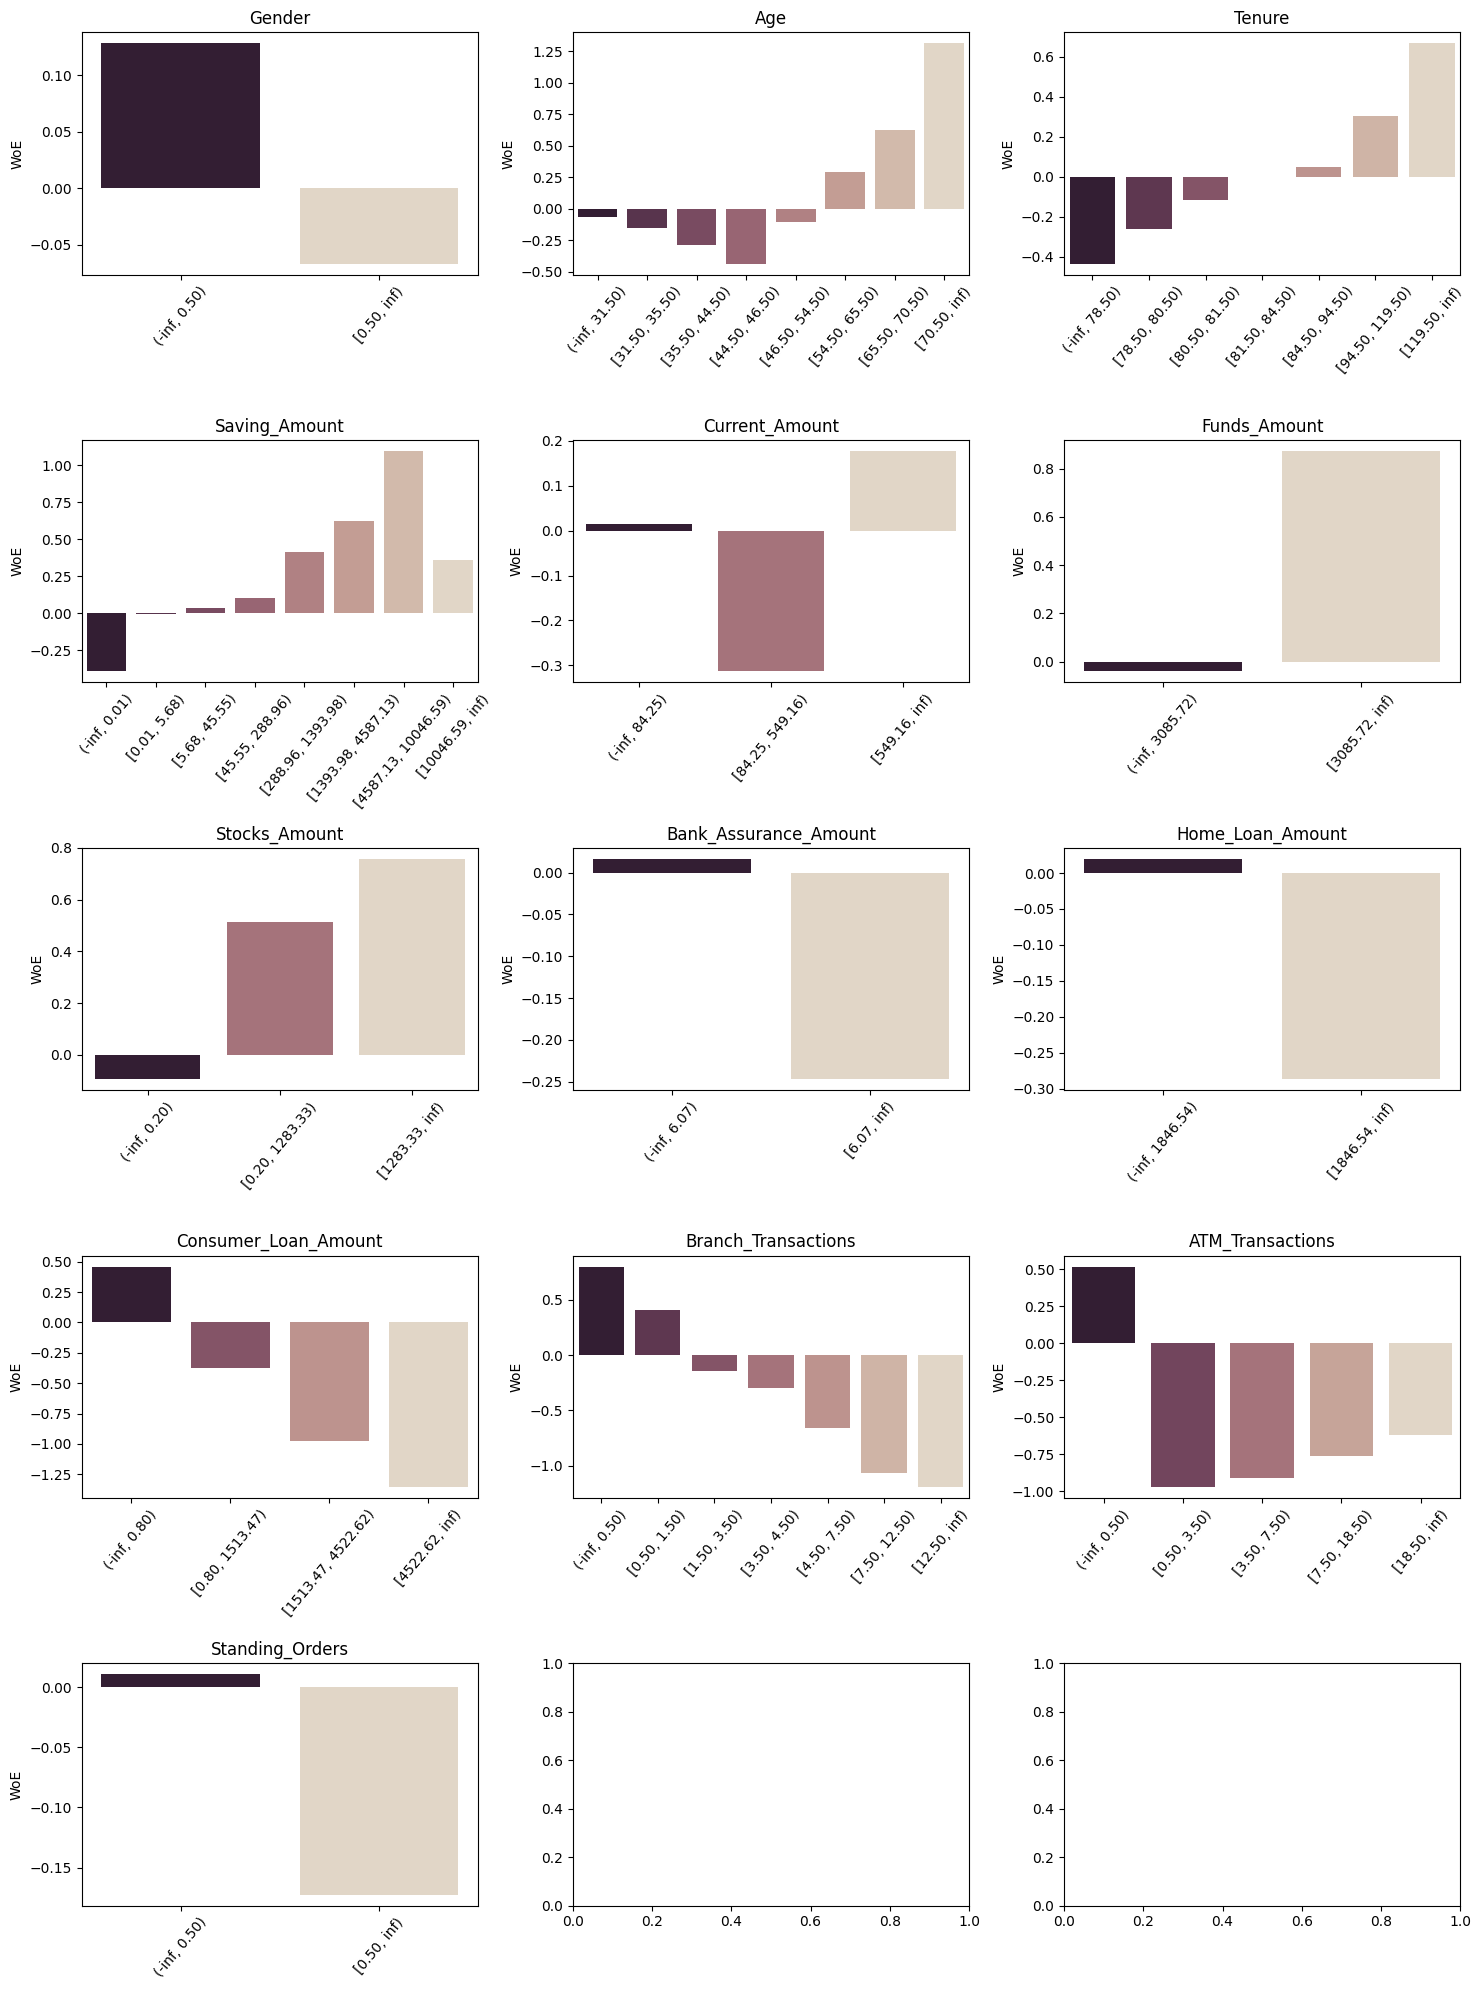

In [36]:
fig, axs = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 20))

for i, ax in zip(list(X_train_binned.columns), axs.ravel()):
  temp = woe_bins.loc[woe_bins['Variable'] == i]
  sns.barplot(x = temp.index, y = 'WoE', data = temp, ax = ax, palette = "ch:.25_r")

  labels = [str(k) for k in temp['Bin']]
  ax.set_title(i)
  ax.set_xticklabels(labels,rotation=50,size=10)

fig.tight_layout()
plt.show()

In [37]:
def get_woe_cat_indicators(X_train, woe_bins, target = 0):
  if target == 0:
    filtered_bins = woe_bins[woe_bins['WoE'] <= 0]
  else:
    filtered_bins = woe_bins[woe_bins['WoE'] >= 0]

  feat_cat_dict = {}
  for col in X_train.columns:
    if filtered_bins[filtered_bins['Variable'] == col]['Bin'].shape[0] == 0:
      continue
    if col == "Gender" and X_train[col].dtype == 'object':
      feat_cat_dict[col] = filtered_bins[filtered_bins['Variable'] == 'Gender']['Bin'].tolist()[0][0]
      continue
    feat_cat_dict[col] = ", ".join(filtered_bins[filtered_bins['Variable'] == col]['Bin'])

  return pd.DataFrame(feat_cat_dict.items(), columns=['Feature', 'Categories'])

Compare feature bins indicating credit card or not 

In [38]:
get_woe_cat_indicators(X_train, woe_bins, 0)

,Feature,Categories
0,Gender,"[0.50, inf)"
1,Age,"(-inf, 31.50), [31.50, 35.50), [35.50, 44.50), [44.50, 46.50), [46.50, 54.50)"
2,Tenure,"(-inf, 78.50), [78.50, 80.50), [80.50, 81.50)"
3,Saving_Amount,"(-inf, 0.01), [0.01, 5.68)"
4,Current_Amount,"[84.25, 549.16)"
5,Time_Deposits_Amount,"(-inf, inf)"
6,Funds_Amount,"(-inf, 3085.72)"
7,Stocks_Amount,"(-inf, 0.20)"
8,Bank_Assurance_Amount,"[6.07, inf)"
9,Life_Assurance_Amount,"(-inf, inf)"


In [39]:
get_woe_cat_indicators(X_train, woe_bins, 1)

,Feature,Categories
0,Gender,"(-inf, 0.50)"
1,Age,"[54.50, 65.50), [65.50, 70.50), [70.50, inf)"
2,Tenure,"[81.50, 84.50), [84.50, 94.50), [94.50, 119.50), [119.50, inf)"
3,Saving_Amount,"[5.68, 45.55), [45.55, 288.96), [288.96, 1393.98), [1393.98, 4587.13), [4587.13, 10046.59), [10046.59, inf)"
4,Current_Amount,"(-inf, 84.25), [549.16, inf)"
5,Time_Deposits_Amount,"(-inf, inf)"
6,Funds_Amount,"[3085.72, inf)"
7,Stocks_Amount,"[0.20, 1283.33), [1283.33, inf)"
8,Bank_Assurance_Amount,"(-inf, 6.07)"
9,Life_Assurance_Amount,"(-inf, inf)"


# TODO: komentar

In [40]:
RF2 = RFClassifier()
GB2 = GBClassifier()
LR2 = LRClassifier()
DT2 = DTClassifier()
XG2 = XGBoostClassifier()

metrics_2 = {}

for model in [
        RF2,
        GB2,
        LR2,
        DT2,
        XG2,
]:
    model._time_on()
    model._fix_errors()
    model.optimize(X_train_binned, y_train)
    model.select_features(X_train_binned, y_train)
    model_metrics_dict = model.get_metrics(X_valid_binned, y_valid)
    metrics_2[model.__class__.__name__] = model_metrics_dict

RFClassifier | optimize | time: 294.72s
RFClassifier | select_features | time: 18.11s
RFClassifier | get_metrics | time: 0.23s
GBClassifier | optimize | time: 270.34s
GBClassifier | select_features | time: 20.31s
GBClassifier | get_metrics | time: 0.04s
LRClassifier | optimize | time: 30.13s
LRClassifier | select_features | time: 0.42s
LRClassifier | get_metrics | time: 0.0s
DTClassifier | optimize | time: 46.48s
DTClassifier | select_features | time: 0.04s
DTClassifier | get_metrics | time: 0.01s
[12:53:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoostClassifier | optimize | time: 208.71s
[12:54:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[12:54:25] WARNING: C:/buildkite-agent/builds/buildkite-wind

In [41]:
pd.DataFrame.from_dict(metrics_2)

,RFClassifier,GBClassifier,LRClassifier,DTClassifier,XGBoostClassifier
Accuracy,0.86347,0.89760,0.91052,0.76661,0.89945
Precision,0.28800,0.33333,0.42857,0.21377,0.37037
Recall,0.37895,0.16842,0.06316,0.62105,0.21053
F1,0.32727,0.22378,0.11009,0.31806,0.26846
AUC,0.76878,0.75699,0.75812,0.76458,0.79114
Brier,0.10523,0.08020,0.07444,0.18387,0.07619
Gini,0.53757,0.51398,0.51624,0.52917,0.58228


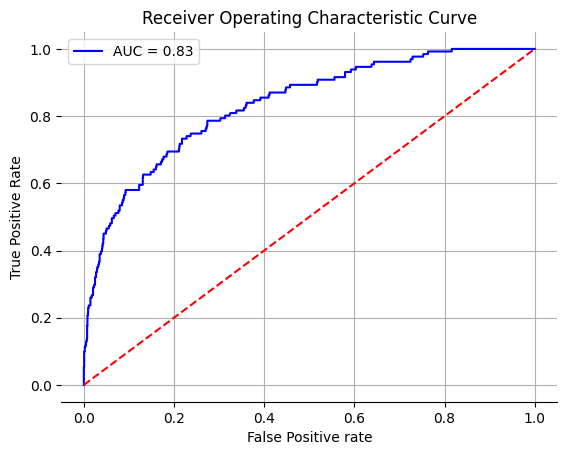

In [46]:
ROC_curve_plot(X_test_binned, y_test, XG2)

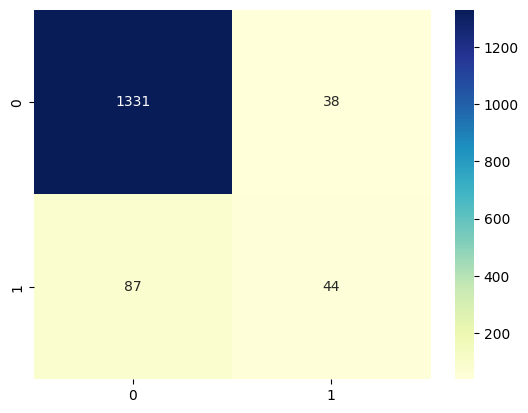

In [47]:
conf_matrix_plot(X_test_binned, y_test, XG2)

In [48]:
XG3 = XGBoostClassifier()

XG3._time_on()
XG3._fix_errors()
XG3.optimize(X_train_binned, y_train, scoring_metric='roc_auc')
XG3.select_features(X_train_binned, y_train, scoring_metric='roc_auc')
XG3.get_metrics(X_valid_binned, y_valid)

[13:20:45] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

XGBoostClassifier | optimize | time: 205.64s
[13:21:34] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[13:21:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[13:21:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "silent" } are not used.

[13:21:40] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "

{'Accuracy': 0.43726937269372695,
 'Precision': 0.12408759124087591,
 'Recall': 0.8947368421052632,
 'F1': 0.21794871794871792,
 'AUC': 0.7810334734713426,
 'Brier': 0.37516624013648286,
 'Gini': 0.5620669469426851}

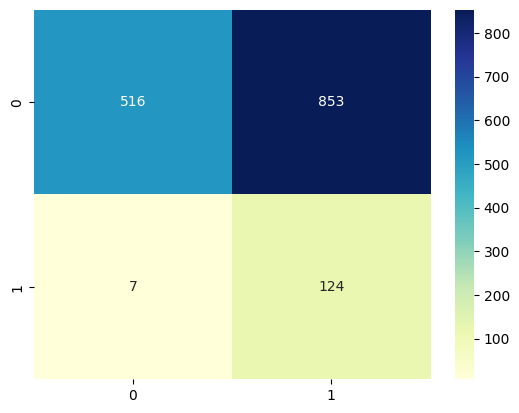

In [49]:
conf_matrix_plot(X_test_binned, y_test, XG3)

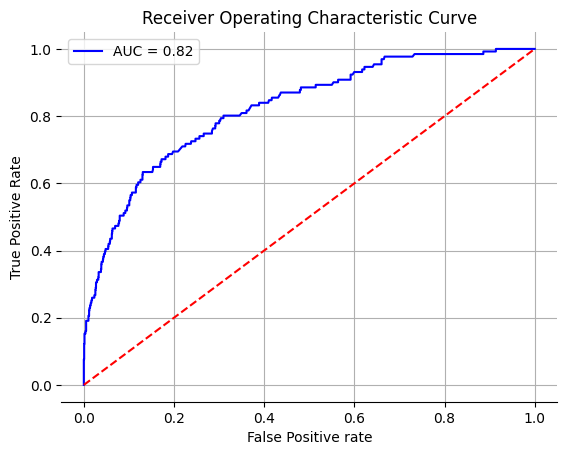

In [50]:
ROC_curve_plot(X_test_binned, y_test, XG3)

In [57]:
fs_model_file = open(os.path.join(MODEL_DIR, 'xgb_model_2.h5'), "wb")
pickle.dump(XG3.get_model(), fs_model_file)
fs_model_file.close()